## Computer Vision  - Project 1 Fundamental of image processing

Li Wang 18461271 

**Question  1**

When performing the image processing, the following equation is employed to produce contrast stretching. 
Explain the role of parameters $c_1 , c_2 , c_3 ,c_4 $ in this intensity transformation function .
$$T(s) = c_1\mbox{tanh }(c_2 s-c_3) + c_4$$

**Solution :Let's take a look at this function, and play around with these parameters.**

**The input intensity value $s\sim (0,255)$, T is the transformed  output intensity value, while $T\sim (0,255)$, $c_1 ,c_2 $  rescale the line vertically and horizentally, while $c_3 , c_4 $ change the location of the line horizentally and vertically.**


 **It is not difficult to see that the nonlinear cure will highlight the high value(150-255) and lower the low value(0,100) , between (100,150) , the curve is relatively linear.**

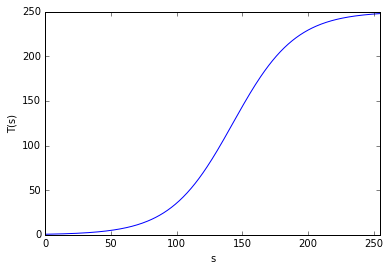

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def trans(s,c_1 , c_2 , c_3 ,c_4 ):  #define the intensity transformation function
    return c_1*np.tanh(c_2*s-c_3)+c_4
s=np.linspace(0,255,256 ,endpoint=True)
T=trans(s,125,0.021,3,125)
plt.plot(s,T) 
#print(trans(130,255,1,0,120))
plt.xlim(0,255)
plt.xlabel("s")
plt.ylabel("T(s)")

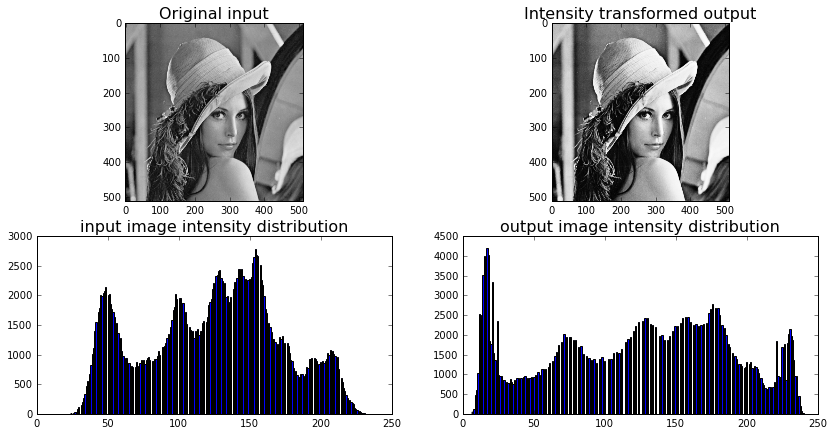

In [4]:
import skimage
from skimage import io,data,color
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
plt.figure(figsize=(14,7))
s = np.array(Image.open("exp1.png").convert("L")) #convert the input 2D color image to grayscale image 
#s=color.rgb2gray(io.imread("exp1.png")) # another way to convert color to grayscale

T=trans(s,125,0.016,2.,122)# Apply the defined transformation
plt.subplot(221)
plt.title("Original input",fontsize=16)
plt.imshow(s,cmap=plt.cm.gray)

#s1,cdf=imtools.histeq(s)
#plt.plot(x,y,"r*")
#print(s.shape)
plt.subplot(222)
plt.title("Intensity transformed output",fontsize=16)
plt.imshow(T,cmap=plt.cm.gray)

#print(t.shape)
plt.subplot(223)

hist_o=s.flatten()
#plt.hist(s.ravel(),bins=256)  # another way to see histgram
plt.hist(hist_o,bins=256)
plt.title("input image intensity distribution",fontsize=16)

plt.subplot(224)
hist_t=T.flatten()
#plt.hist(T.ravel(),bins=256)
plt.hist(hist_t,bins=256)
plt.title("output image intensity distribution",fontsize=16)

plt.show()

Comment of Question 1: we obtain the input image intensity distribution and insert the data into the transformation function above, and plot the output intensity distribution. Comparing the intensity histgram between the input and output images, a significance change can be seen due to the transformation.

## Question 2
(a)   scattering salt and pepper to the input image to 0.2, while  0.1 is  pitch black,0.1 is white.

**Solution: First of all, we convert a color image to grayscale image, then we get the shape(r,c) and the size of the image. Since the corruption is 0.2, so the corrupted size is (0.2 $\times$ input image size), that's the desired salt-pepper size.**


**Next, we run the iteration for the desired degrade intensity, and employ the property of bernoulli distribution to generate random numbers (0,1) with equal probability. Obviously,the distribution of both 0 and 1 are 0.5.**


**Then we assign these randomly distributed 0 and 255(multiply 1 by 255) values to random position (r,c) inside the loop. In other words, 20% of the original intensity values in the input image are replaced by new values: 10% 0(black) and 10% 255(white). **

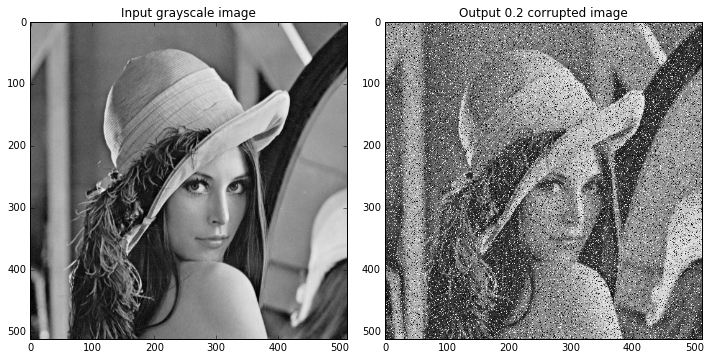

In [4]:
%matplotlib inline
import skimage
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
import numpy as np
plt.figure(figsize=(10,5))

plt.subplot(121)
lena = np.array(Image.open("exp1.png").convert("L")) #open a color image ,and convert it to grayscale image.
plt.imshow(np.array(Image.open("exp1.png").convert("L")),cmap=plt.cm.gray)
plt.title("Input grayscale image")
#print("The shape and the dtype of this input image are %s and %s respectively."% (screenshot.shape,screenshot.dtype))
plt.subplot(122)
def degrade(input_image,impulses_density):
    r,c = input_image.shape  # obtain the imgage shape, and assign (r,c)=(row,colum)
    salt_pepper_size = round(input_image.size*impulses_density)  #20% degrade,so the degraded size is 0.2*(image size),
    for k in range(1,salt_pepper_size+1): # the number of iterations is the salt_pepper_size.
        i= np.random.randint(1,r) #i is randomly drawn from image rows.
        j= np.random.randint(1,c) #j is randomly drawn froom image colums.
        input_image[i][j]=stats.bernoulli.rvs(0.5,size=1)*255 #randomly assign 0 or 255 to coordinate(i,j) with equal probability.
    return input_image
impulses_density = 0.2
output_lena=degrade(lena,impulses_density)
plt.imshow(output_lena,cmap=plt.cm.gray)
plt.title("Output %.1f corrupted image"%impulses_density)
plt.tight_layout()

## Question 2
(b) Applying corruption to each colour channel of the input image.



**Solution: We add the noise to each channel.(Red, Green and Blue)
Next,we merge the above corrupted 3 channels.**




**why we can see  all sors of bright colors?**


**This is because when adding salt and pepper noise to each channel, the assigned 
value is either 0 or the full value of corresponding channel, therefore, we can see red,green, blue and black dots on the merged image.**

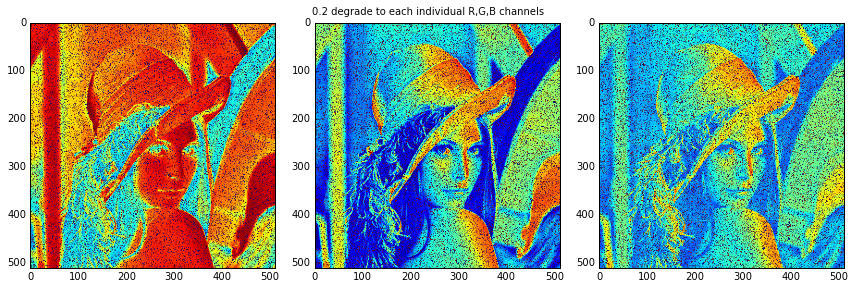

In [5]:
lena1 = np.array(Image.open("exp1.png"))
rgb_split = [lena1[:,:,0],lena1[:,:,1],lena1[:,:,2] ]            
noi_split = [degrade(i,0.2) for i in rgb_split] #we apply corruption to each channel
plt.figure(figsize=(12,4))
for m,n in enumerate(noi_split):
    plt.subplot(1,3,m+1)
    plt.imshow(n)
plt.suptitle("0.2 degrade to each individual R,G,B channels",alpha=4)
plt.tight_layout()

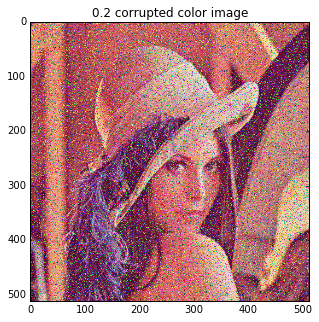

In [6]:
plt.figure(figsize=(10,5))
noi_merge=Image.fromarray(np.dstack(noi_split))#merge the rgb channels
plt.imshow(noi_merge)
plt.title("0.2 corrupted color image")

## Question 2
(c) apply a median filter to remove the noise added to the colour image.

**We use $3\times3$ and $5\times5$ window size median filter to remove the d=0.2 and d=0.5 noise. When the window size is too large, the result of filtered image is not optical.**

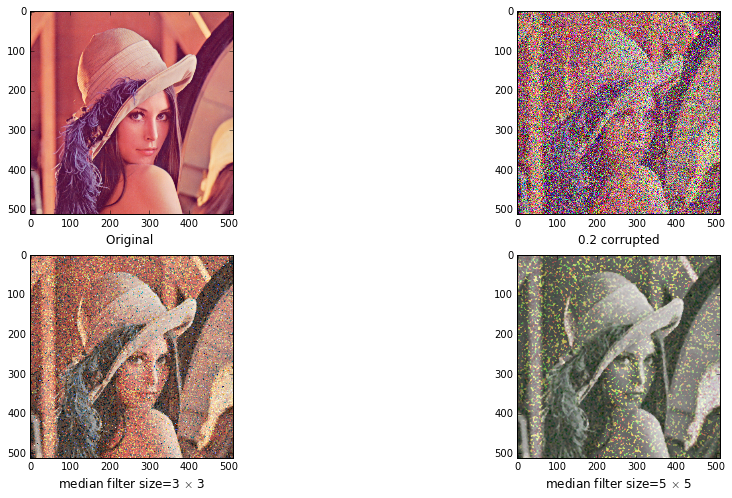

In [17]:
import scipy.ndimage as ndi
plt.figure(figsize=(16,8))
lena1 = np.array(Image.open("exp1.png"))
#plt.imshow(noi_merge)
plt.subplot(221)
plt.imshow(lena1)
plt.xlabel("Original ",fontsize=12)
noi_merge=Image.fromarray(np.dstack(noi_split))#merge the rgb channels
plt.subplot(222)
plt.imshow(noi_merge)
plt.xlabel("0.2 corrupted",fontsize=12)
med_lena=ndi.median_filter(noi_merge,size=3) #apply the median filter 
plt.subplot(223)
plt.imshow(med_lena)
plt.xlabel(r"median filter size=3 $\times$ 3 ",fontsize=12)
plt.subplot(224)
med_lena=ndi.median_filter(noi_merge,size=5)
plt.imshow(med_lena)
plt.xlabel(r"median filter size=5 $\times$ 5 ",fontsize=12)

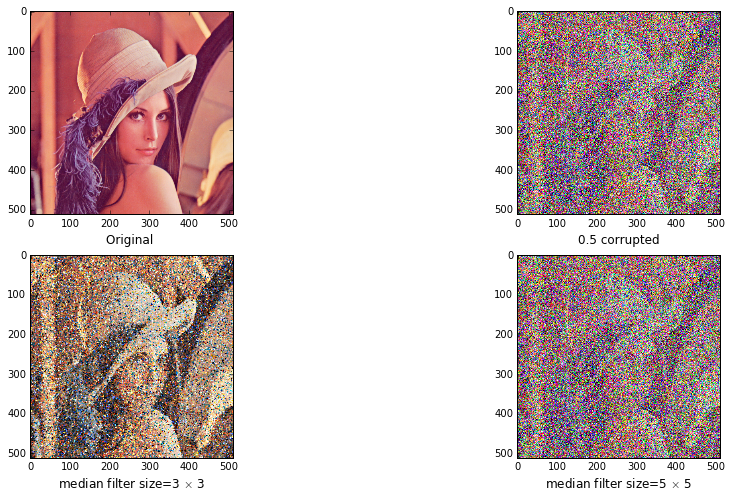

In [18]:
import scipy.ndimage as ndi
plt.figure(figsize=(16,8))
lena1 = np.array(Image.open("exp1.png"))
#plt.imshow(noi_merge)
plt.subplot(221)
plt.imshow(lena1)
plt.xlabel("Original ",fontsize=12)
noi_split_1 = [degrade(i,0.5) for i in rgb_split] #we apply 0.5 degradation to each channel
noi_merge=Image.fromarray(np.dstack(noi_split_1))#merge the rgb channels
plt.subplot(222)
plt.imshow(noi_merge)
plt.xlabel("0.5 corrupted",fontsize=12)
med_lena=ndi.median_filter(noi_merge,size=3) #apply the median filter 
plt.subplot(223)
plt.imshow(med_lena)
plt.xlabel(r"median filter size=3 $\times$ 3 ",fontsize=12)
plt.subplot(224)
med_lena=ndi.median_filter(noi_merge,size=5)
plt.imshow(med_lena)
plt.xlabel(r"median filter size=5 $\times$ 5 ",fontsize=12)
plt.imshow(noi_merge)

## Question 3
 Unsharp mask 
 

 
 
 **Solution: 
  sharpened_output image = original + mask = origianl + k*(original - average filtered image)**

**where k is usered defined multiplier.**

**when adding or substracting values to the image, for the Unit8 type images, results greater than 255 are  truncated to 255, while values smaller than 0 are set to 0.**

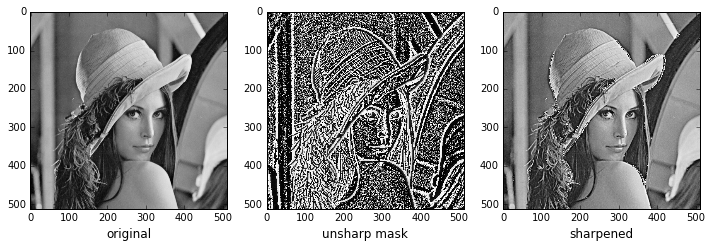

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage.morphology import disk
selem=disk(5)
plt.figure(figsize=(12,4))
lena=np.array(Image.open("exp1.png").convert("L"))

plt.subplot(131)
plt.imshow(lena,cmap=plt.cm.gray)
plt.xlabel("original",fontsize=12)

plt.subplot(132)
 
average_filter=rank.mean(lena,selem=selem)  #average filter
mask=lena-average_filter  # mask = original -average filtered image
plt.imshow(mask,cmap=plt.cm.gray)
plt.xlabel("unsharp mask",fontsize=12)

plt.subplot(133)
sharpen=lena+mask  #sharpend= original + k*mask  , k is user defined multiplier
plt.imshow(sharpen,cmap=plt.cm.gray)
plt.xlabel("sharpened",fontsize=12)

## Question 4  
a .Derive the formaula for bilinear interpolation.




**First,we do the caculation on the vertical direction. **
we do the linear interpolation to get point A(x,y_f):$$ A(x,y_f) = \frac{x-x_f}{x_c-x_f}A(x_c,y_f)+\frac{x_c-x}{x_c-x_f}{A(x_f,x_f)}
 (1)$$



then we caculate A(x,y_c):
$$A(x,y_c)=\frac{x-x_f}{x_c-x_f}{(A(x_c,y_c)- A(x_f,y_c) )}+ A(x_f,y_c) = \frac{x-x_f}{x_c-x_f}A(x_c,y_c)+\frac{x_c-x}{x_c-x_f}{A(x_f,y_c)};;(2)$$


then we get B(x,y) on the horizental direction:
$$B(x,y)= \frac{y_c-y}{y_c-y_f}A(x,y_f) + \frac{y_f-y}{y_c-y_f}A(x,y_c)$$
substituting equation(1) and (2) into the above equation, then
$$B(x,y)= \frac{1}{(x_c-x_f)(y_c-y_f)}[(y_c-y)(x-x_f)A(x_c,y_f)+((y_c-y))(x_c-x)A(x_f,x_f)]+ [(y-y_f)(x-x_f)A(x_c,y_c)+(y-y_f)(x_c-x)A(x_f,x_c)] $$

rewrite the above equation ,we obtain $B(x',y')$
$$B(x',y') = (x_c-x)\left[(y_c-y)A(x_f,x_f)+(y-y_f)A(x_f,x_c)\right]+(x-x_f)\left[(y_c-y)A(x_c,y_f)+(y-y_f)A(x_c,y_c)\right]$$

(-0.5, 793.5, 1122.5, -0.5)

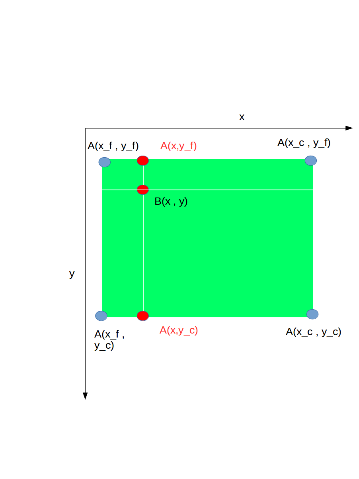

In [21]:
plt.figure(figsize=(10,8))
bilinear=np.array(Image.open("bilinear.png"))
plt.imshow(bilinear)
plt.axis("off")

## Question 4 
b rotate the image.

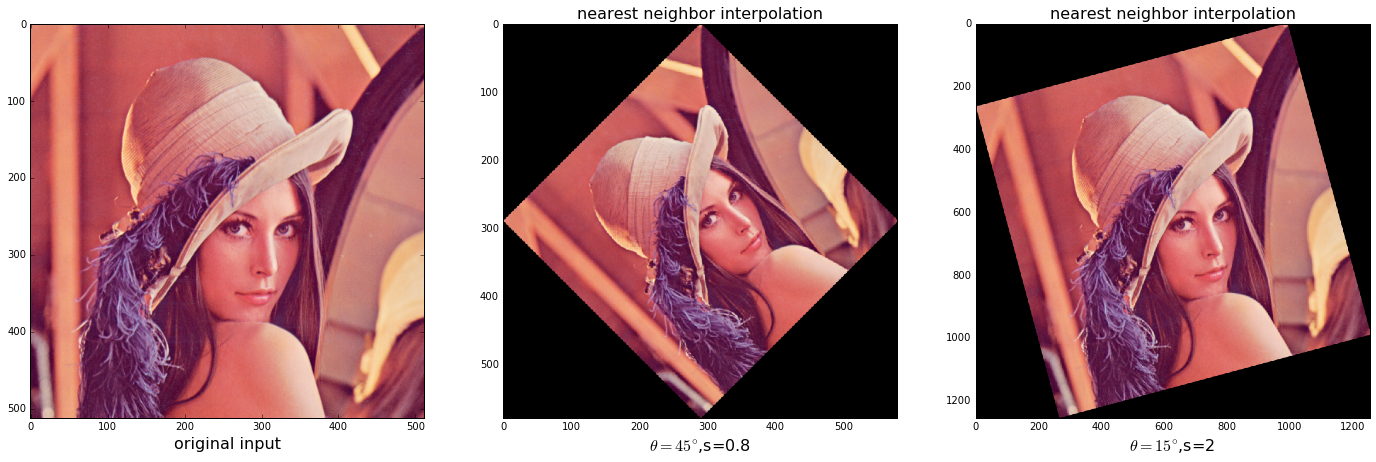

In [24]:
from skimage import transform
from scipy.misc import imresize
plt.figure(figsize=(24,8))
plt.subplot(131)
lena=np.array(Image.open("exp1.png"))
plt.imshow(lena)
plt.xlabel("original input",fontsize=16)

plt.subplot(132)
rotate=transform.rotate(lena,45,resize=True)

rotate_rescale1=imresize(rotate,0.8,interp="nearest")
plt.imshow(rotate_rescale1)
plt.xlabel(r"$\theta = 45^{\circ}$,s=0.8",fontsize=16)
plt.title("nearest neighbor interpolation",fontsize=16)

plt.subplot(133)

rotate2=transform.rotate(lena,15,resize=True)
rotate_rescale2=imresize(rotate2,2.,interp="nearest")
plt.imshow(rotate_rescale2)
plt.xlabel(r"$\theta = 15^{\circ}$,s=2",fontsize=16)
plt.title("nearest neighbor interpolation",fontsize=16)


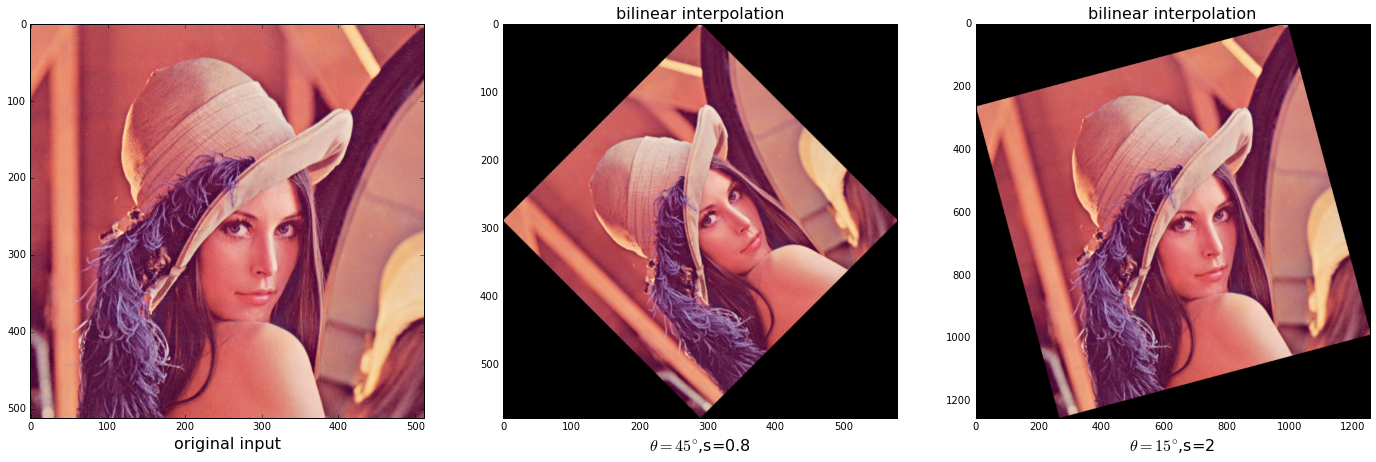

In [37]:
from skimage import transform
from scipy.misc import imresize
plt.figure(figsize=(24,8))
plt.subplot(131)
lena=np.array(Image.open("exp1.png"))
plt.imshow(lena)
plt.xlabel("original input",fontsize=16)
plt.subplot(132)
rotate=transform.rotate(lena,45,resize=True)

rotate_rescale1=imresize(rotate,0.8,interp="bilinear")
plt.imshow(rotate_rescale1)
plt.xlabel(r"$\theta = 45^{\circ}$,s=0.8",fontsize=16)
plt.title("bilinear interpolation",fontsize=16)
plt.subplot(133)

rotate2=transform.rotate(lena,15,resize=True)
rotate_rescale2=imresize(rotate2,2.,interp="bilinear")
plt.imshow(rotate_rescale2)
plt.xlabel(r"$\theta = 15^{\circ}$,s=2",fontsize=16)
plt.title("bilinear interpolation",fontsize=16)

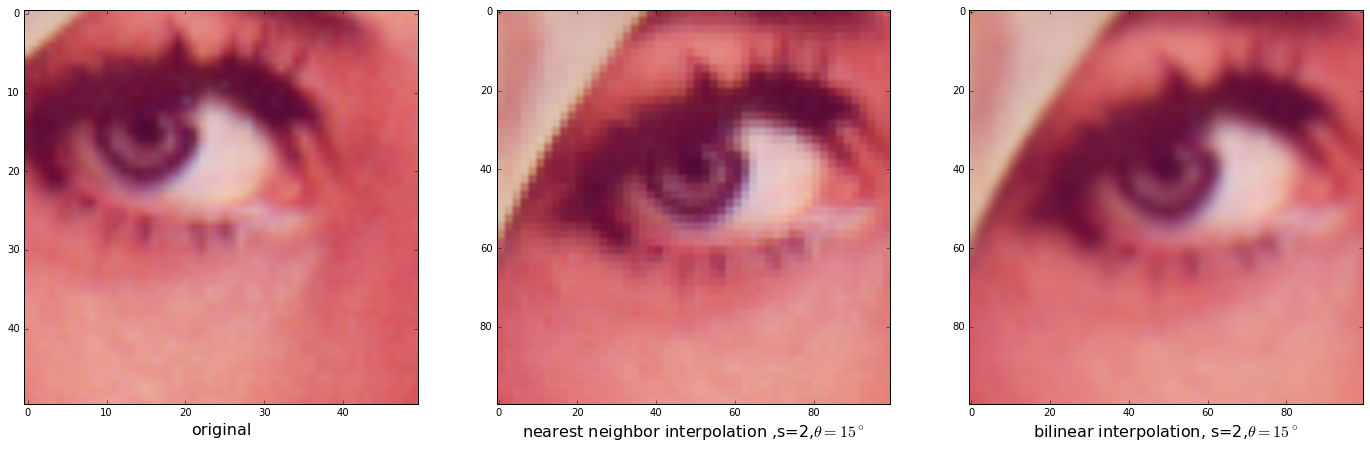

In [38]:

plt.figure(figsize=(24,8))
lena_cut=lena1[250:300,250:300,:]
plt.subplot(131)
plt.xlabel("original",fontsize=16)
plt.imshow(lena_cut)
plt.subplot(132)

rotate_rescale2=imresize(rotate2,2.,interp="nearest")
cut_2=rotate_rescale2[600:700,600:700,:]
plt.imshow(cut_2)
plt.xlabel(r"nearest neighbor interpolation ,s=2,$\theta =15 ^\circ$",fontsize=16)

plt.subplot(133)
rotate_rescale3=imresize(rotate2,2.,interp="bilinear")
cut_3=rotate_rescale3[600:700,600:700,:]

plt.imshow(cut_3)
plt.xlabel(r"bilinear interpolation, s=2,$\theta =15 ^\circ$",fontsize=16)


Question 4 Comment: A sharp intensity jump between adjacent pixels can be seen from the second image due to the nearest neighbor interpolation. While the bilinear interpolation is more smoother, though some details are missing(the eye color).